# IMD Kolkata DWR Example

Author: [Hamid Ali Syed](https://syedha.com)

In [1]:
import os
import re
import glob
import pyart
import shutil
import numpy as np
import xarray as xr
import xradar as xd
import pyscancf as pcf
import cartopy.crs as ccrs


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119


## Cite PyScanCf:

## Syed, H. A.,Sayyed, I., Kalapureddy, M. C. R., & Grandhi, K. K.(2021). 
## PyScanCf – The library for individual sweep datasets of IMD weather radars. 
## Zenodo. doi:10.5281/zenodo.5574160.



## Overview

PyScanCf, up until version 1.0.28, was built to directly use data from the folder where it's stored. We did this to sort and organize the data properly, making sure the scans are correctly grouped into a Cf-Radial volume. Initially, IMD radar data came in separate folders based on its type — Type B data in its own folder, separate from Type C data, for instance. This setup was to automate the sorting and aggregating of the data, keeping different types of data well-organized right from the start.

However, IMD has recently been mixing Type B and Type C data in the same folder. As we prepare for a new version release, this notebook will guide you through handling mixed data sets. We will organize the files into their appropriate folders. If a data file is for short-range or Type B and requires more than three sweeps for a volume scan, it will go into one folder. Long-range or Type C data will go into another folder. We will name these folders based on the number of sweeps. For example, a folder for Type-B radar mode with 6 sweeps will be called `sweep_6`, and if a Type C volume is made from 2 sweeps, the folder will be named `sweep_2`. This way, we'll move the data into the right folders, and then it will be easy for PyScanCf to make it Cf-radial.

Here's our plan:

1. Use the `process_file` function to sort the data into the correct folders.
2. Use `load_folder_names` to get the names of these folders after sorting.
3. Use `est_grid_shape` to determine the best grid shape for processing the data.

This method ensures the data is neatly organized and easy to use, simplifying the process for users to handle the data.

## Organize Data

In [2]:
def process_file(file_path, organized_dir):
    ds = xr.open_dataset(file_path)
    sweep_number = ds.dims['sweep']
    
    # Create the directory
    directory_name = f"sweep_{sweep_number}"
    os.makedirs(os.path.join(organized_dir, directory_name), exist_ok=True)
    
    # Move the file to the directory
    destination_path = os.path.join(organized_dir, directory_name, os.path.basename(file_path))
    shutil.copy2(file_path, destination_path)
    
    print(f"File '{file_path}' copied to '{destination_path}'")

### Setting Up Directories for Data Organization

- `raw_dir`: The directory where your raw radar data is stored.
- `organized_dir`: The target directory where the organized data will be placed.

In [3]:
# Example usage
raw_dir = "KOLKATA_RADAR_DATA/"
organized_dir = "KOL_ORG"
files = glob.glob("KOLKATA_RADAR_DATA/*")

# Create 'organized' directory if it doesn't exist
os.makedirs(organized_dir, exist_ok=True)

for file in files:
    process_file(file, organized_dir)

File 'KOLKATA_RADAR_DATA/CAL220430170207-IMD-C.nc.4' copied to 'KOL_ORG/sweep_6/CAL220430170207-IMD-C.nc.4'
File 'KOLKATA_RADAR_DATA/CAL220430172209-IMD-C.nc' copied to 'KOL_ORG/sweep_6/CAL220430172209-IMD-C.nc'
File 'KOLKATA_RADAR_DATA/CAL220430170207-IMD-C.nc.3' copied to 'KOL_ORG/sweep_6/CAL220430170207-IMD-C.nc.3'
File 'KOLKATA_RADAR_DATA/CAL220430170207-IMD-C.nc' copied to 'KOL_ORG/sweep_6/CAL220430170207-IMD-C.nc'
File 'KOLKATA_RADAR_DATA/CAL220430174203-IMD-C.nc.1' copied to 'KOL_ORG/sweep_6/CAL220430174203-IMD-C.nc.1'
File 'KOLKATA_RADAR_DATA/CAL220430170000-IMD-C.nc.1' copied to 'KOL_ORG/sweep_2/CAL220430170000-IMD-C.nc.1'
File 'KOLKATA_RADAR_DATA/CAL220430180207-IMD-C.nc.2' copied to 'KOL_ORG/sweep_6/CAL220430180207-IMD-C.nc.2'
File 'KOLKATA_RADAR_DATA/CAL220430135206-IMD-C.nc.5' copied to 'KOL_ORG/sweep_6/CAL220430135206-IMD-C.nc.5'
File 'KOLKATA_RADAR_DATA/CAL220430122000-IMD-C.nc' copied to 'KOL_ORG/sweep_2/CAL220430122000-IMD-C.nc'
File 'KOLKATA_RADAR_DATA/CAL220430135206

File 'KOLKATA_RADAR_DATA/CAL220430121207-IMD-C.nc.3' copied to 'KOL_ORG/sweep_6/CAL220430121207-IMD-C.nc.3'
File 'KOLKATA_RADAR_DATA/CAL220430121207-IMD-C.nc.4' copied to 'KOL_ORG/sweep_6/CAL220430121207-IMD-C.nc.4'
File 'KOLKATA_RADAR_DATA/CAL220430174203-IMD-C.nc.5' copied to 'KOL_ORG/sweep_6/CAL220430174203-IMD-C.nc.5'
File 'KOLKATA_RADAR_DATA/CAL220430114000-IMD-C.nc' copied to 'KOL_ORG/sweep_2/CAL220430114000-IMD-C.nc'
File 'KOLKATA_RADAR_DATA/CAL220430174203-IMD-C.nc.2' copied to 'KOL_ORG/sweep_6/CAL220430174203-IMD-C.nc.2'
File 'KOLKATA_RADAR_DATA/CAL220430121000-IMD-C.nc.1' copied to 'KOL_ORG/sweep_2/CAL220430121000-IMD-C.nc.1'
File 'KOLKATA_RADAR_DATA/CAL220430171000-IMD-C.nc' copied to 'KOL_ORG/sweep_2/CAL220430171000-IMD-C.nc'
File 'KOLKATA_RADAR_DATA/CAL220430132207-IMD-C.nc.5' copied to 'KOL_ORG/sweep_6/CAL220430132207-IMD-C.nc.5'
File 'KOLKATA_RADAR_DATA/CAL220430125207-IMD-C.nc.2' copied to 'KOL_ORG/sweep_6/CAL220430125207-IMD-C.nc.2'
File 'KOLKATA_RADAR_DATA/CAL22043013

File 'KOLKATA_RADAR_DATA/CAL220430181000-IMD-C.nc.1' copied to 'KOL_ORG/sweep_2/CAL220430181000-IMD-C.nc.1'
File 'KOLKATA_RADAR_DATA/CAL220430171207-IMD-C.nc.5' copied to 'KOL_ORG/sweep_6/CAL220430171207-IMD-C.nc.5'
File 'KOLKATA_RADAR_DATA/CAL220430131205-IMD-C.nc.4' copied to 'KOL_ORG/sweep_6/CAL220430131205-IMD-C.nc.4'
File 'KOLKATA_RADAR_DATA/CAL220430130206-IMD-C.nc.3' copied to 'KOL_ORG/sweep_6/CAL220430130206-IMD-C.nc.3'
File 'KOLKATA_RADAR_DATA/CAL220430171207-IMD-C.nc.2' copied to 'KOL_ORG/sweep_6/CAL220430171207-IMD-C.nc.2'
File 'KOLKATA_RADAR_DATA/CAL220430135206-IMD-C.nc' copied to 'KOL_ORG/sweep_6/CAL220430135206-IMD-C.nc'
File 'KOLKATA_RADAR_DATA/CAL220430125000-IMD-C.nc' copied to 'KOL_ORG/sweep_2/CAL220430125000-IMD-C.nc'
File 'KOLKATA_RADAR_DATA/CAL220430130206-IMD-C.nc.4' copied to 'KOL_ORG/sweep_6/CAL220430130206-IMD-C.nc.4'
File 'KOLKATA_RADAR_DATA/CAL220430131205-IMD-C.nc.3' copied to 'KOL_ORG/sweep_6/CAL220430131205-IMD-C.nc.3'
File 'KOLKATA_RADAR_DATA/CAL22043014

### Retrieving Organized Data Folder Names

This function, `load_folder_names`, is designed to fetch and return the names of all subdirectories within a specified directory, which in this case is intended to be the directory where the radar data has been organized in the above step i,e., using `process_file` function. This is particularly useful for quickly getting an overview of the different sets of organized data, categorized by sweep numbers, without manually navigating the directory structure.

In [4]:
def load_folder_names(organized_dir):
    folder_names = next(os.walk(organized_dir))[1]
    return folder_names

# Example usage
folders = load_folder_names(organized_dir)
print(folders)

['sweep_2', 'sweep_6']


## Creating CfRadial Data

Before utilizing the `pcf.cfrad` function to aggregate radar data into CfRadial format, it's essential to define the source and destination directories for the operation. The `input_dir` should be set to the directory where your organized radar data is stored (`organized_dir`), and `output_dir` should be the target directory where you want the aggregated CfRadial data to be saved.

In [5]:
input_dir = organized_dir
output_dir = "KOL_CFRADIAL"

for folder_name in folders:
    folder_path = os.path.join(input_dir, folder_name)
    sweep_number = int(folder_name.split("_")[1])
    if sweep_number > 2:
        scan_type = 'B'
    elif sweep_number <= 2:
        scan_type = 'C'
    pcf.cfrad(input_dir=folder_path, output_dir=output_dir, scan_type=scan_type, nf=sweep_number)

Number of files:  52
Total no. of output files: 26.
Merging all scans into one Volume
Data merging done 
Total Time Elapsed:  0:00:04.409257
Number of files:  162
Total no. of output files: 27.
Merging all scans into one Volume
Data merging done 
Total Time Elapsed:  0:00:12.493864


In [6]:
# !ls $output_dir

## Gridding Data

In [7]:
def est_grid_shape(height_from=0, height_to=10e3, vert_res=250, max_range=100e3, horz_res=500):
    '''
    Estimate the grid shape for radar grid data based on given parameters.
    
    Parameters:
    - height_from: Bottom or start height in meters. Default is 0 (surface).
    - height_to: Top or end height in meters. Default is 10,000 meters (10 km).
    - vert_res: Vertical resolution or gap in meters. Default is 250 meters.
    - max_range: Maximum range of the radar in meters. Default is 100,000 meters (100 km).
    - horz_res: Horizontal resolution in meters. Default is 500 meters.
    
    Returns:
    A tuple (vert_points, horz_points, horizontal) indicating the number of points vertically and horizontally.
    '''
    
    def _linspace_range(start, stop, step):
        # Adjust to include both endpoints by adding a step if stop is not on a step from start
        num = int((stop - start) / step) + 1
        return num
    
    # Fix applied here: Changed the second parameter of the first call to `height_to`
    vert_points = _linspace_range(start=height_from, stop=height_to, step=vert_res)
    
    # The horizontal range calculation considers the radar range in both directions
    horz_points = _linspace_range(start=-max_range, stop=max_range, step=horz_res)
    
    return vert_points, horz_points, horz_points

### Configuring Radar Data Grid Parameters

To accurately grid radar data, defining the grid's spatial dimensions and resolutions is essential. This involves specifying the vertical range (height) of the radar's observation area, the maximum horizontal range (distance from the radar station), and the resolutions (spacing between data points) for both vertical and horizontal dimensions.

Here's a step-by-step guide to configuring these parameters and determining the grid shape and limits for radar data processing:

1. **Define Vertical Range Parameters:**
   - `height_from`: The starting height (in meters) from which the grid begins, typically set to 0.0 meters to start from the surface level.
   - `height_to`: The maximum height (in meters) the grid extends to, for example, 10,000 meters (10 km) above the surface.

2. **Set Maximum Horizontal Range:**
   - `max_rng`: The maximum horizontal range (in meters) from the radar, indicating how far out the radar data will be considered. This example uses 250,000 meters (250 km).

3. **Specify Resolutions:**
   - `vert_res`: The vertical resolution (in meters), determining the spacing between each vertical data point within the grid. Here, it's set to 500 meters.
   - `horz_res`: The horizontal resolution (in meters), which sets the spacing between data points in the horizontal plane. This is also 500 meters in the example.

4. **Calculate Grid Shape:**
   Use the `est_grid_shape` function, providing it with the previously defined parameters, to calculate the grid shape. This function will return the number of vertical and horizontal points that will make up the grid based on the provided resolutions and range limits.

5. **Determine Grid Limits:**
   Define the grid limits for the z (height), y, and x dimensions based on the specified parameters.

In [8]:
height_from=0.0
height_to=10e3
max_rng = 200e3
vert_res=250
horz_res=500

# Calculate grid shape
grid_shape = est_grid_shape(height_from=height_from, height_to=height_to,
                            max_range=max_rng, vert_res=vert_res, horz_res=horz_res)
# Calculate grid limits
grid_limits = (height_from, height_to), (-max_rng, max_rng), (-max_rng, max_rng) # z, y, x

In [9]:
grid_shape

(41, 801, 801)

In [10]:
grid_limits

((0.0, 10000.0), (-200000.0, 200000.0), (-200000.0, 200000.0))

The configuration specifies that `grid_limits`, set to ((0.0, 10000.0) for vertical height, and (-200000.0, 200000.0) for both horizontal dimensions, will be organized into a `grid_shape` of (41, 801, 801). This structure indicates a division of the 10 km vertical extent into 41 layers, with each layer having a thickness of 250 meters. Horizontally, the grid extends from -200,000 to 200,000 meters along both the X and Y axes, segmented into 801 columns and 801 rows, with each cell measuring 500 meters across.

### Gridding

In the below cell, only 4 volume scans are processed due to the slice `[:4]` on `line 7`. To process the entire dataset, remove `[:4]` from `for cfile in cfiles[:4]:`, changing it to `for cfile in cfiles:`. This adjustment ensures all data files are included in the gridding process.

In [11]:
# Define the output directory for grids
gridded_dir = "KOL_GRID"
!rm -rf $gridded_dir
os.makedirs(gridded_dir, exist_ok=True)
# Converting to grids
cfiles = sorted(glob.glob(os.path.join(output_dir, "*.nc")))
for cfile in cfiles[:4]: # remove the [0:1], and keep it like "cfiles:" only to transform all the files
    radar = pyart.io.read(cfile)
    grid = pyart.map.grid_from_radars(radar,grid_shape,
                                      (grid_limits),
                                      weighting_function='Barnes2',
                                      fields=radar.fields.keys(),)

    filename = os.path.basename(cfile)
    output_path = os.path.join(gridded_dir, f"grid_{filename}")
    print(f"File saved in {gridded_dir} as grid_{filename}")
    pyart.io.write_grid(filename=output_path, grid=grid)

File saved in KOL_GRID as grid_cfrad_CAL220430112010-IMD-C.nc
File saved in KOL_GRID as grid_cfrad_CAL220430112232-IMD-C.nc
File saved in KOL_GRID as grid_cfrad_CAL220430113000-IMD-C.nc
File saved in KOL_GRID as grid_cfrad_CAL220430113206-IMD-C.nc


### Load gridded data

In [12]:
grid_data = sorted(glob.glob(gridded_dir+"/*.nc"))

In [13]:
grid_data

['KOL_GRID/grid_cfrad_CAL220430112010-IMD-C.nc',
 'KOL_GRID/grid_cfrad_CAL220430112232-IMD-C.nc',
 'KOL_GRID/grid_cfrad_CAL220430113000-IMD-C.nc',
 'KOL_GRID/grid_cfrad_CAL220430113206-IMD-C.nc']

### Read data using xarray directly

In [15]:
file_list = []
for file in grid_data:
    ds_temp = xr.open_dataset(file)
    file_list.append(ds_temp.where(ds_temp.REF<100))
ds = xr.concat(file_list, dim='time')

In [16]:
ds

<xarray.Dataset> Size: 8GB
Dimensions:                     (time: 4, z: 41, y: 801, x: 801, nradar: 1)
Coordinates:
  * time                        (time) datetime64[ns] 32B 2022-04-30T11:20:10...
  * x                           (x) float64 6kB -2e+05 -1.995e+05 ... 2e+05
  * y                           (y) float64 6kB -2e+05 -1.995e+05 ... 2e+05
  * z                           (z) float64 328B 0.0 250.0 ... 9.75e+03 1e+04
Dimensions without coordinates: nradar
Data variables: (12/14)
    origin_latitude             (time, z, y, x) float32 421MB 22.57 ... nan
    origin_longitude            (time, z, y, x) float32 421MB 88.35 ... nan
    origin_altitude             (time, z, y, x) float32 421MB 35.0 35.0 ... nan
    projection                  (time, z, y, x) float64 842MB 1.0 1.0 ... nan
    ProjectionCoordinateSystem  (time, z, y, x) float64 842MB 1.0 1.0 ... nan
    radar_latitude              (nradar, time, z, y, x) float32 421MB 22.57 ....
    ...                          ...
    radar_time                  (nradar, time, z, y, x) datetime64[ns] 842MB ...
    radar_name                  (nradar, time, z, y, x) object 842MB b'CAL' ....
    REF                         (time, z, y, x) float32 421MB 11.19 ... nan
    VEL                         (time, z, y, x) float32 421MB 9.969e+36 ... nan
    WIDTH                       (time, z, y, x) float32 421MB 9.969e+36 ... nan
    ROI                         (time, z, y, x) float32 421MB 7.406e+03 ... nan
Attributes:
    instrument_name:  CAL
    Conventions:      CF/Radial
    history:          created by syed44 on MacBook-Pro-6.local at 2024-04-06T...
    field_names:      REF, VEL, WIDTH
    volume_number:    0
    platform_type:    fixed
    instrument_type:  radar
    primary_axis:     axis_z

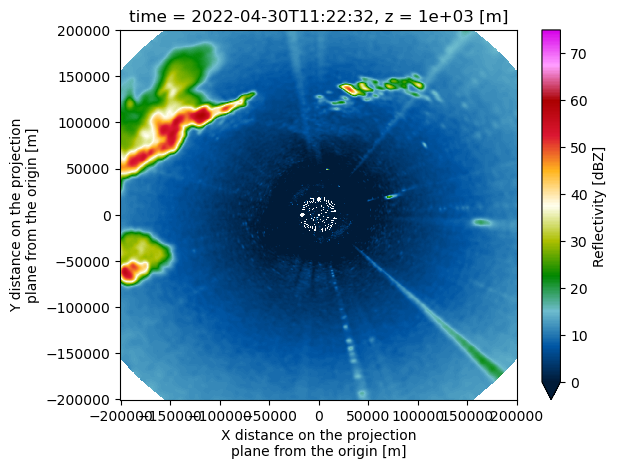

In [17]:
ds['REF'].isel(time=1).sel(z=1000, method='nearest').plot(vmin=0, vmax=75, cmap='SyedSpectral')

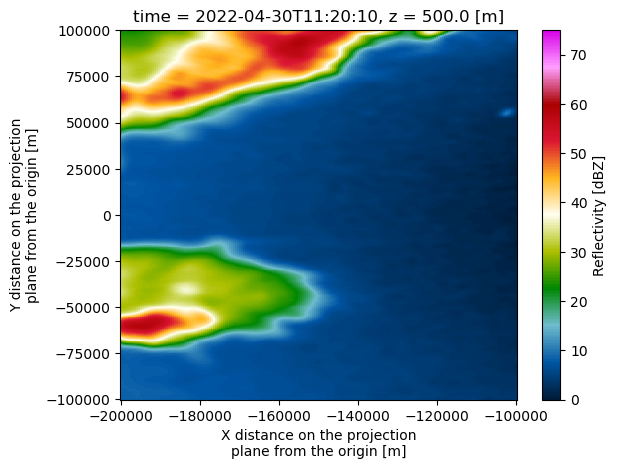

In [18]:
ds['REF'].sel(x=slice(-250e3, -100e3), y=slice(-100e3, 100e3)).sel(z=500,
 method='nearest').isel(time=0).plot(vmin=0, vmax=75, cmap='SyedSpectral')

In [ ]:
# ds.to_netcdf("Merged_KOL_radar.nc")